# Doppler (from NASA)

In [ ]:
import random
import numpy
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def dopplerShift(freqMHz, data, speed, angle):
    # fd = (V*cos(a) * f0) / c
    c = 3 * pow(10, 8)
    freqHz = freqMHz * pow(10, 6)
    speedMS = speed * 1000 / 3600
    print("Km/h = ",speed,"  ", "m/s = ", speedMS)
    dopplerFrequency = (speedMS * np.cos(angle) * freqHz) / c
    print(dopplerFrequency)
    shiftedData = 0
    return shiftedData

In [55]:
carrierFreq = 2600
data = [[random.random() for i in range(2)] for i in range(10)]
dopplerShift(carrierFreq, data, 120, 0)

[[0.9979208426259112, 0.8310550830734214], [0.5605618635068381, 0.5266993253829729], [0.9014603785934229, 0.1945009105116876], [0.04255657547903935, 0.2391194061946157], [0.8653209655141824, 0.6028688353395076], [0.6956967636656338, 0.3916223101734172], [0.5094517716335375, 0.16269121080681037], [0.7818228086141457, 0.07191546262397663], [0.47708758424765796, 0.8556889493265567], [0.14813513273649692, 0.38697377900023]]
Km/h =  120    m/s =  33.333333333333336
288.8888888888889


0

In [42]:
# r = np.arange(0, 2 * np.pi, 0.1)
# theta = np.sin(r)
r = 0.7
theta = 1 * r

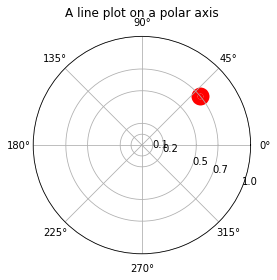

In [44]:

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta, r, linewidth=12, color='red')
ax.set_rmax(1)
ax.set_rticks([0.1, 0.2, 0.5, 0.7, 1])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

AttributeError: 'Figure' object has no attribute 'figsize'

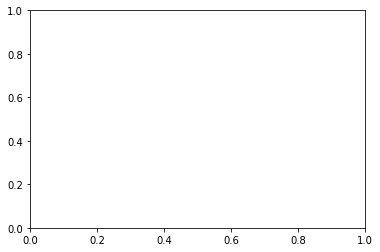

In [77]:
x = np.arange(0, 2 * np.pi, 0.001)
n = 1000
y = np.sin(x)
y1 = np.sin(x*15)
y2 = np.sin(x*30)
y3 = np.sin(x*45)
fig, ax = plt.subplots()
fig.figsize(10, 10)
ax.plot(x[:n], y[:n], color='red')
ax.plot(x[:n], y1[:n], color='blue')
ax.plot(x[:n], y2[:n], color='green')
ax.plot(x[:n], y3[:n], color='orange')
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()